In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [51]:
class RFAData:
    def __init__(self, filename):
        """Initialize RFA data from a measurement file."""
        # Header information
        self.measurement_date = None
        self.operator = ""
        self.comments = ""
        self.projectile = ""
        
        # Beam parameters
        self.energy = 0.0
        self.extractor = 0.0
        self.focus1 = 0.0
        self.focus2 = 0.0
        
        # RFA parameters
        self.suppressor_voltage = 0.0
        self.rfa_comments = ""
        
        # Wien filter
        self.wien_voltage = 0.0
        
        # Sweep parameters
        self.sweep_start = 0.0
        self.sweep_end = 0.0
        self.sweep_step = 0.0
        self.measurement_time = 0.0
        self.integration_time = 0.0
        self.plc = 0.0
        self.points_per_step = 0.0
        
        # Measurement data
        self.retarding_voltage = None  # Will be numpy array
        self.mean_current = None       # Will be numpy array
        
        self._load_file(filename)

    
    def _load_file(self, filename):
        """Load and parse the measurement file."""
        with open(filename, 'r') as file:
            lines = file.readlines()
            
        # Parse header information
        data_start_index = None
        in_rfa_section = False  # Flag to track if we're in the RFA section


        # first, record date (that doesn't fit the standard ":" format)
        datetime_str = lines[0].strip().replace("Measured on ", "")
        self.measurement_date = datetime.strptime(datetime_str, "%H:%M:%S %d/%m/%Y")
        
        for i, line in enumerate(lines):
            line = line.strip()
            
            if not line:
                continue
            
            # Check for data section
            if "Retading voltage (kV)" in line and "Mean current FC (A)" in line:
                data_start_index = i + 1
                break
                
            # Check if we're entering RFA section
            if "RFA#:" in line:
                in_rfa_section = True
                
            # Handle fields that might be empty
            if ":" in line:
                parts = line.split(':', 1)  # Split on first colon only
                field = parts[0].strip()
                value = parts[1].strip() if len(parts) > 1 else ""
                
                # Remove any remaining tabs
                value = value.replace('\t', '').strip()
                    
                if field == "Operated by":
                    self.operator = value
                elif field == "Comments":
                    # Assign to appropriate comments field based on section
                    if in_rfa_section:
                        self.rfa_comments = value
                    else:
                        self.comments = value
                elif field == "Projectile":
                    self.projectile = value
                elif field == "Energy (V)":
                    self.energy = float(value) if value else 0.0
                elif field == "Extractor (%)":
                    self.extractor = float(value) if value else 0.0
                elif field == "Focus 1 (%)":
                    self.focus1 = float(value) if value else 0.0
                elif field == "Focus 2 (%)":
                    self.focus2 = float(value) if value else 0.0
                elif field == "Suppressor voltage (V)":
                    self.suppressor_voltage = float(value) if value else 0.0
                elif field == "Wien voltage (V)":
                    self.wien_voltage = float(value) if value else 0.0
                elif field == "Sweep start (kV)":
                    self.sweep_start = float(value) if value else 0.0
                elif field == "Sweep end (kV)":
                    self.sweep_end = float(value) if value else 0.0
                elif field == "Sweep step (V)":
                    self.sweep_step = float(value) if value else 0.0
                elif field == "Measurement time (s)":
                    self.measurement_time = float(value) if value else 0.0
                elif field == "Integration time (s)":
                    self.integration_time = float(value) if value else 0.0
                elif field == "PLC":
                    self.plc = float(value) if value else 0.0
                elif field == "Points per step":
                    self.points_per_step = float(value) if value else 0.0
        
        if data_start_index is None:
            raise ValueError("Could not find data section in file")
            
        # Parse measurement data
        data_lines = [line.strip() for line in lines[data_start_index:] if line.strip()]
        voltage_data = []
        current_data = []
        
        for line in data_lines:
            v, i = line.split('\t')
            voltage_data.append(float(v.replace('E', 'e')))
            current_data.append(float(i.replace('E', 'e')))
        
        self.retarding_voltage = np.array(voltage_data)
        self.mean_current = np.array(current_data)


        

Measurement taken by: Ennio Kristof
Energy: 1000.0 V
Number of data points: 217


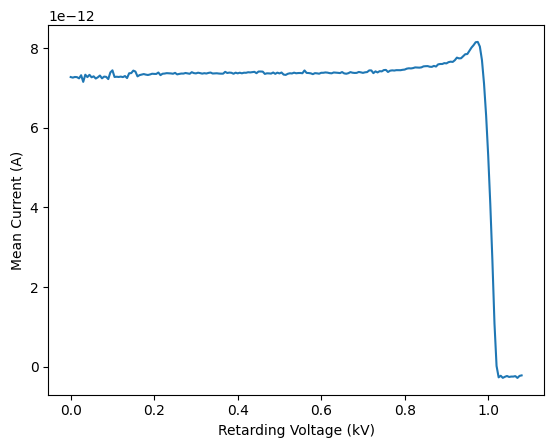

In [52]:
# Load a measurement file
rfa_data = RFAData(r"raw data\2024-12-06\rfa-full 29-supp700 -1k.txt")

# Access the data
print(f"Measurement taken by: {rfa_data.operator}")
print(f"Energy: {rfa_data.energy} V")
print(f"Number of data points: {len(rfa_data.retarding_voltage)}")

# Plot the data
import matplotlib.pyplot as plt
plt.plot(rfa_data.retarding_voltage, rfa_data.mean_current)
plt.xlabel('Retarding Voltage (kV)')
plt.ylabel('Mean Current (A)')
plt.show()

In [53]:
rfa_data.supp

AttributeError: 'RFAData' object has no attribute 'supp'

In [54]:
rfa_data.__dict__

{'measurement_date': datetime.datetime(2024, 12, 6, 14, 29, 31),
 'operator': 'Ennio Kristof',
 'comments': 'supp man -700V',
 'projectile': 'Ar',
 'energy': 1000.0,
 'extractor': 99.0,
 'focus1': 67.0,
 'focus2': 6.0,
 'suppressor_voltage': -700.0,
 'rfa_comments': '2 grid retar, no grid big diameter supp.',
 'wien_voltage': 69.0,
 'sweep_start': 0.0,
 'sweep_end': 1.1,
 'sweep_step': 5.0,
 'measurement_time': 0.5,
 'integration_time': 0.1,
 'plc': 5.0,
 'points_per_step': 5.0,
 'retarding_voltage': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
        0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
        0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
        0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
        0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 